In [1]:
import pandas as pd
import numpy as np

In [4]:


star_dataset = pd.read_csv('/content/drive/MyDrive/ML/HO/HO4/star_dataset.csv')

star_dataset = star_dataset[(star_dataset['Spectral Class'] == 'B') | (star_dataset['Spectral Class'] == 'O')]

star_dataset_2features = star_dataset[['Temperature (K)','Absolute magnitude(Mv)']]
Xo = star_dataset[star_dataset['Spectral Class'] == 'O']
XB = star_dataset[star_dataset['Spectral Class'] == 'B']
Xo = Xo[['Temperature (K)','Absolute magnitude(Mv)']]
XB = XB[['Temperature (K)','Absolute magnitude(Mv)']]
Xo = Xo.to_numpy()
XB = XB.to_numpy()
X_features = star_dataset_2features.to_numpy()

### <font color=blue>1. Maximum Likelihood</font> ###

__Report Mean and Covariance values for each class__

In [5]:
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(Xo)
print("CLASS O: ")
print('\u03BC = ', cov.location_, sep="\n")
print('\u03A3 = ', cov.covariance_, sep="\n")

CLASS O: 
μ = 
[ 2.2294075e+04 -6.5961750e+00]
Σ = 
[[ 1.09342188e+08 -6.18115637e+02]
 [-6.18115637e+02  2.23654314e+00]]


In [6]:
cov = EmpiricalCovariance().fit(XB)
print("CLASS B: ")
print('\u03BC = ', cov.location_, sep="\n")
print('\u03A3 = ', cov.covariance_, sep="\n")

CLASS B: 
μ = 
[1.95744783e+04 3.72260870e+00]
Σ = 
[[ 3.75467284e+07 -2.67843319e+04]
 [-2.67843319e+04  7.51544584e+01]]


### <font color=blue>2. Bayesian Density Estimation</font> ###
__1. Report Mean and Covariance values for each class__<br>

In [7]:
from sklearn.mixture import BayesianGaussianMixture
BDE = BayesianGaussianMixture(n_components=2,covariance_type='full').fit(X_features)
print('\u03BC = ', BDE.means_, sep="\n")
print('\u03A3 = ', BDE.covariances_, sep="\n")

μ = 
[[ 1.69991164e+04  1.12995085e+01]
 [ 2.23633698e+04 -5.98819185e+00]]
Σ = 
[[[ 1.72475019e+07 -4.40571606e+03]
  [-4.40571606e+03  9.39796002e+00]]

 [[ 8.50458233e+07 -1.97805026e+03]
  [-1.97805026e+03  5.75522159e+00]]]


### <font color=blue>3. Expectation Maximization</font> ###
__1. Report Mean and Covariance values for each class__<br>
__2. Plot the Clusters__

In [8]:
from sklearn.mixture import GaussianMixture

GMM = GaussianMixture(n_components=2, covariance_type='full').fit(X_features) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged
means = GMM.means_ 
covariances = GMM.covariances_

print('\u03BC = ', means, sep="\n")
print('\u03A3 = ', covariances, sep="\n")

Converged: True
μ = 
[[ 1.68391667e+04  1.18154167e+01]
 [ 2.23878871e+04 -6.06737097e+00]]
Σ = 
[[[ 1.49760780e+07 -1.80027465e+03]
  [-1.80027465e+03  6.74842493e-01]]

 [[ 8.65636517e+07 -1.56714093e+03]
  [-1.56714093e+03  4.44045265e+00]]]


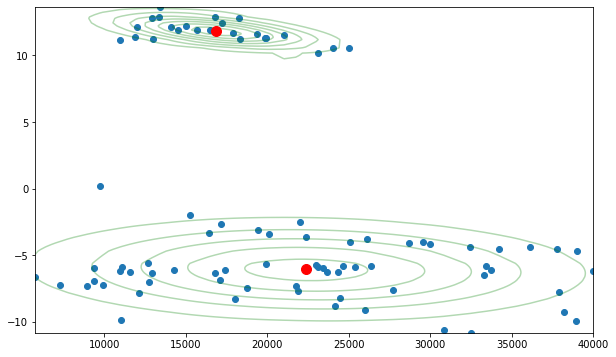

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

x,y = np.meshgrid(np.sort(X_features[:,0]),np.sort(X_features[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

# Plot   
fig = plt.figure(figsize=(10,6))
ax0 = fig.add_subplot(111)
ax0.scatter(X_features[:,0],X_features[:,1])
for m,c in zip(means,covariances):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X_features[:,0]),np.sort(X_features[:,1]),multi_normal.pdf(XY).reshape(len(X_features),len(X_features)),colors='green',alpha=0.3)
    ax0.scatter(m[0],m[1],c='red',zorder=10,s=100)
    
plt.show()


### <font color=blue>4. Gaussian HMM</font><br> ###

__1. Write the Transition Matrix and Emission Matrix__<br><br>
__2. What is the probability of <font color=green>Sunny, Rainy, Rainy, Rainy, Snowy, Snowy</font>? (No need to code!)__<br><br>
__3. Suppose that a man wore <font color=green>Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat</font>. What is the most likely weather condition in these 7 consecutive days?__

**1.**

Transition Matrix:

|         |   Sunny   |  Rainy  | Snowy  |
|---------|:-------- :|------:|------:|
|  Sunny  |    0.8   |  0.15  | 0.05  |
|   Rainy   |    0.38    |   0.6 |  0.02 |
|   Snowy   |    0.75    |   0.05|  0.2 |

Emission Matrix:

|         |   T-Shirt   |  Umbrella  |   Coat   |
|---------|:-------:|--------:|---------:|
|  Sunny  |    0.6  |  0.1    |    0.3   |
|   Rainy   |    0.05  |   0.65   |    0.3   |
|   Snowy   |    0.0  |   0.5   |    0.5   |

Initial Probability:

##### P(Sunny) = 0.7
##### P(Rainy)   = 0.25
##### P(Rainy)   = 0.05

**2.**

**Prob** = 0.7 * 0.15 * 0.6 * 0.6 * 0.02 * 0.2 = 0.0001512

**3.**

In [12]:
import numpy as np
from hmmlearn import hmm
    
states = ["Sunny", "Rainy", "Snowy"]
n_states = len(states)

observations = ["T-shirt", "Umbrella", "Coat"]
n_observations = len(observations)

In [13]:
model = hmm.MultinomialHMM(n_components = n_states, init_params= "", params= "")

model.startprob_ = np.array([0.7, 0.25, 0.05])    

model.transmat_ = np.array([
        [0.8, 0.15, 0.05], 
        [0.38, 0.6, 0.02],
        [0.75, 0.05, 0.2]])   
    
model.emissionprob_ = np.array([
        [0.6, 0.1, 0.3],
        [0.05, 0.65, 0.3],
        [0.0, 0.5, 0.5]])

In [14]:
# predict a sequence of hidden states based on visible states
sto = np.array([[2, 2, 1, 1, 0, 1, 2]]).T

model = model.fit(sto)
logprob, hs = model.decode(sto, algorithm="viterbi")
print("Observation:", sto.T)
print("States:", hs)

print("Clothes:", ", ".join(map(lambda x: observations[int(x)], sto)))
print("States are:", ", ".join(map(lambda x: states[int(x)], hs)))

Observation: [[2 2 1 1 0 1 2]]
States: [1 1 1 1 0 0 0]
Clothes: Coat, Coat, Umbrella, Umbrella, T-shirt, Umbrella, Coat
States are: Rainy, Rainy, Rainy, Rainy, Sunny, Sunny, Sunny


In [11]:
pip install hmmlearn

     |████████████████████████████████| 368kB 9.6MB/s 
